In [1]:
from models import Entity, Environment
import numpy as np
import torch
import torch.utils.data as Data
import matplotlib.pyplot as plt

In [3]:
params = {
    "layers": [
        {
            "type": "Linear",
            "in": 1,
            "out": 6
        },
        {
            "type": "Tanh"
        },
        {
            "type": "Linear",
            "in": 6,
            "out": 6
        },
        {
            "type": "Tanh"
        },
        {
            "type": "Linear",
            "in": 6,
            "out": 1
        }
    ],
    "criterion": "MSELoss",
    "optimizer": {
        "name": "SGD",
        "lr": 0.01,
        "momentum": 0.001
    }
}

In [4]:
ent = Entity(params)

In [1]:
x_arr = torch.linspace(-1, 1, 500) + torch.normal(0, 0.01, size=500)
y_arr = torch.exp(x_arr)
# x_arr = x_arr.unsqueeze(1)
# y_arr = y_arr.unsqueeze(1)
plt.plot(x_arr, y_arr)

NameError: name 'torch' is not defined

In [6]:
dataset = Data.TensorDataset(x_arr.unsqueeze(1),y_arr.unsqueeze(1))
loader = Data.DataLoader(
	dataset=dataset,
    batch_size=5, # Divided into batches
    shuffle=True  # Whether to disrupt the data, the default is False
)

In [7]:
for epoch in range(3):
        for step, (batch_x, batch_y) in enumerate(loader):
            print("Epoch: ", epoch, "| Step: ", step, "| batch x:",
                  batch_x.numpy(), "| batch y: ", batch_y.numpy())

Epoch:  0 | Step:  0 | batch x: [[-0.43434343]
 [ 0.93939394]
 [-1.        ]
 [-0.35353535]
 [-0.7777778 ]] | batch y:  [[0.64768976]
 [2.5584304 ]
 [0.36787945]
 [0.7022012 ]
 [0.4594258 ]]
Epoch:  0 | Step:  1 | batch x: [[-0.27272728]
 [-0.8787879 ]
 [-0.17171718]
 [-0.61616164]
 [-0.5151515 ]] | batch y:  [[0.7613004 ]
 [0.41528597]
 [0.8422173 ]
 [0.54001325]
 [0.5974101 ]]
Epoch:  0 | Step:  2 | batch x: [[-0.41414142]
 [-0.8989899 ]
 [ 0.53535354]
 [ 0.33333334]
 [ 0.7373737 ]] | batch y:  [[0.6609075 ]
 [0.40698054]
 [1.708052  ]
 [1.3956125 ]
 [2.0904381 ]]
Epoch:  0 | Step:  3 | batch x: [[ 0.47474745]
 [-0.030303  ]
 [ 0.17171718]
 [ 0.35353535]
 [ 0.23232324]] | batch y:  [[1.6076082 ]
 [0.97015154]
 [1.1873419 ]
 [1.4240934 ]
 [1.2615274 ]]
Epoch:  0 | Step:  4 | batch x: [[-0.5959596 ]
 [ 0.03030306]
 [-0.6767677 ]
 [-0.959596  ]
 [-0.65656567]] | batch y:  [[0.55103356]
 [1.0307668 ]
 [0.50825715]
 [0.3830476 ]
 [0.51862943]]
Epoch:  0 | Step:  5 | batch x: [[ 0.6363636 

In [8]:
print(ent.train(loader, 200)[-10:])

[0.0018001299058596487, 0.0017634560441365465, 0.0017318341564532603, 0.001732241212448571, 0.0017198790999827906, 0.0017073669529054313, 0.0016867974365595729, 0.001666132484388072, 0.0016485341606312432, 0.0016330478028976358]


In [9]:
y = ent.predict(x_arr.unsqueeze(1))

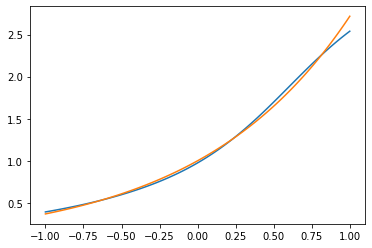

In [10]:
plt.plot(x_arr, y.squeeze(1))
plt.plot(x_arr, y_arr)

In [11]:
x = torch.linspace(1, 1.5, 50)

In [12]:
y = ent.predict(x.unsqueeze(1))

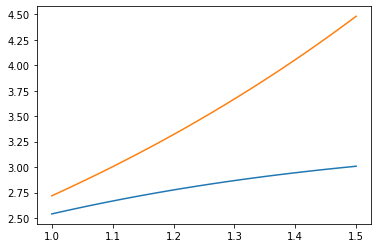

In [13]:
plt.plot(x, y.squeeze(1)) 
plt.plot(x, torch.exp(x))